In [1]:
import torch
from classifier.model import get_model
from classifier.loader import loader

num_images_to_show = 10

res_net, input_size = get_model("alexnet")
res_net.load_state_dict(torch.load("../output/crop_from_gt/alexnet_1.pth"))
res_net.eval()
loader = loader("../bird_dataset/crop_from_gt", input_size, "train", 1, shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

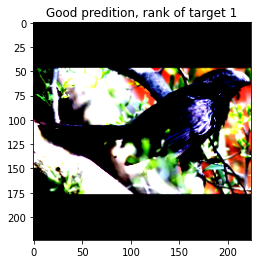

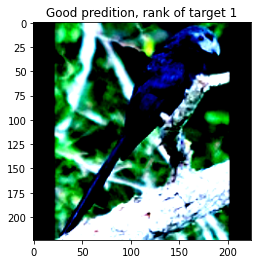

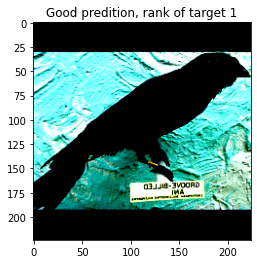

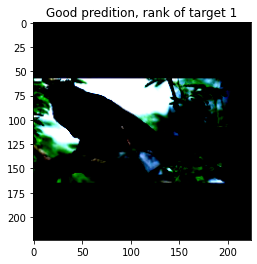

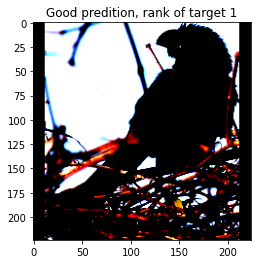

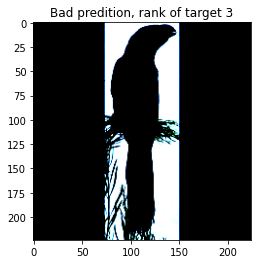

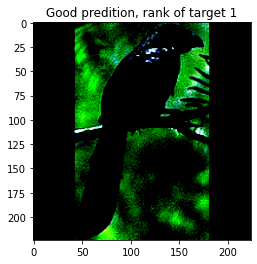

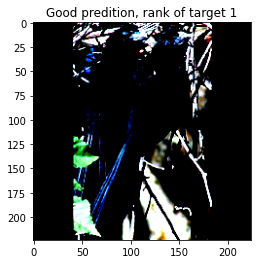

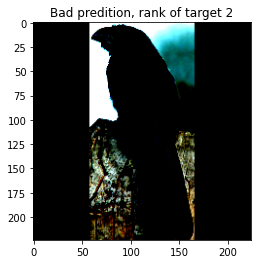

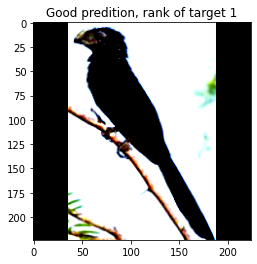

<Figure size 432x288 with 0 Axes>

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import torch

num_images_shown = 0

for image_batch, target in loader:
    if num_images_shown >= num_images_to_show:
        break

    with torch.set_grad_enabled(False):
        outputs = res_net(image_batch)

    _, prediction = torch.max(outputs, 1)
    ranked_prediction = pd.Series(outputs.flatten(), name="outputs").sort_values(ascending=False).reset_index(drop=False)
    rank_target = ranked_prediction.loc[ranked_prediction["index"] == int(target[0])].index[0] + 1

    image = np.array(image_batch.permute(0, 2, 3, 1))[0]
    plt.imshow(image)

    result = "Good" if prediction == target else "Bad"
    plt.title(f"{result} predition, rank of target {rank_target}")
    
    plt.figure()
    num_images_shown += 1